In [1]:
# ----------------------------------------------------------------------------
#
# TITLE -
# AUTHOR - 
# PROJECT -
# CONTENTS:
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''
Explore the effect of selecting stars on the chemo-spatial properties of AstroNN stars. 
'''

__author__ = "James Lane"

In [64]:
### Imports

## Basic
import numpy as np
import sys, os, pdb, copy
from tqdm import tqdm_notebook as tqdm_nb
# import glob
# import subprocess

## Plotting
from matplotlib import pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages
# from matplotlib import colors
# from matplotlib import cm
# import aplpy

## Astropy
from astropy.io import fits
# from astropy.coordinates import SkyCoord
# from astropy import table
from astropy import units as apu
# from astropy import wcs

## galpy
from galpy import orbit
from galpy import potential
from galpy import actionAngle
from galpy.util import bovy_coords as gpcoords
from galpy.util import bovy_conversion as gpconv
from galpy.util import bovy_plot as gpplot

In [13]:
# Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [14]:
### Make the actionAngle object
qdf_aA= actionAngle.actionAngleAdiabatic(pot=potential.MWPotential2014, c=True)

# Load All Data
Load the precut AstroNN catalog and calculate the value of $z_{max}$, then compare to the current height.

In [71]:
### Load catalogs
gaiadr2_apogee_catalog = '../../data/generated/gaiadr2-apogee_dataset.FIT'
f = fits.open(gaiadr2_apogee_catalog)
data = f[1].data

In [72]:
### Cut on galactocentric absolute Z < 0.3 kpc
where_low_z = np.where( np.abs(data['Z']) < 100 )[0]
data_low_z = data[where_low_z] 
# z_select_text = r'$|$Z$_{GC}| < 0.3$ kpc'
nstars = len(where_low_z)

In [73]:
### Read catalog values

# ID & kinematics
apid = data_low_z['APOGEE_ID']
locid = data_low_z['LOCATION_ID']
vhelio = data_low_z['VHELIO']
pmll = data_low_z['PM_LL']
pmbb = data_low_z['PM_BB']
gc_x = data_low_z['X']
gc_y = data_low_z['Y']
gc_z = data_low_z['Z']
gc_vx = data_low_z['VX']
gc_vy = data_low_z['VY']
gc_vz = data_low_z['VZ']

# Convert to galactocentric radius and radial velocity
gc_R = np.sqrt(np.square(gc_x)+np.square(gc_y))
gc_phi = np.arctan2(gc_y,gc_x)
gc_vR = np.cos(gc_phi)*gc_vx + np.sin(gc_phi)*gc_vy
gc_vT = -np.sin(gc_phi)*gc_vx + np.cos(gc_phi)*gc_vy

# Make into one large kinematic array
gc_kin = np.array((gc_R*apu.kpc, gc_vR*apu.km/apu.s, gc_vT*apu.km/apu.s, gc_z*apu.kpc, gc_vz*apu.km/apu.s))
gc_kin.shape

(5, 117261)

Why have so many of these evaluations failed? Probably the array passing syntax is wrong. Try doing it in a loop instead.

In [74]:
qdf_aA.turn_physical_on()
zmax_all = np.zeros(nstars)

for i in tqdm_nb( range(nstars) ):
    
    # Calculate zmax. Pass R,vR,vT,z,vz
    aA_vals = qdf_aA.EccZmaxRperiRap(gc_R[i]*apu.kpc, 
                                       gc_vR[i]*apu.km/apu.s, 
                                       gc_vT[i]*apu.km/apu.s, 
                                       gc_z[i]*apu.kpc, 
                                       gc_vz[i]*apu.km/apu.s)
    
    zmax_all[i] = aA_vals[1].value
    
###i

A Jupyter Widget

/Users/JamesLane/Software/Python/anaconda3/envs/ast1501-dev/lib/python3.6/site-packages/galpy/actionAngle/actionAngleAdiabatic.py:207: RuntimeWarning: overflow encountered in square
  rap= nu.sqrt(Rap**2.+zmax**2.)

/Users/JamesLane/Software/Python/anaconda3/envs/ast1501-dev/lib/python3.6/site-packages/galpy/actionAngle/actionAngleAdiabatic.py:208: RuntimeWarning: invalid value encountered in true_divide
  ecc= (rap-rperi)/(rap+rperi)



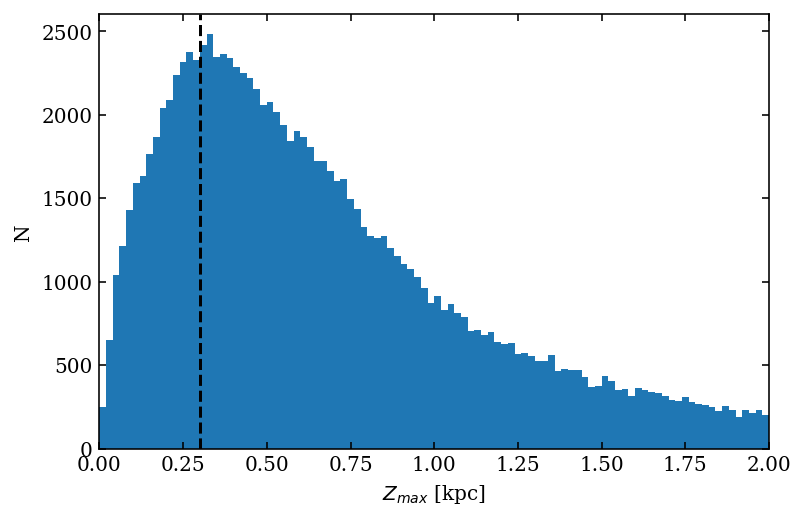

In [75]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist( zmax_all, bins=100, range=(0,2) )
ax.axvline(0.3, linestyle='dashed', color='Black')

ax.set_xlim(0,2)
ax.set_xlabel(r'$Z_{max}$ [kpc]')
ax.set_ylabel(r'N')

plt.show()
plt.close('all')
pass;

/Users/JamesLane/Software/Python/anaconda3/envs/ast1501-dev/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.



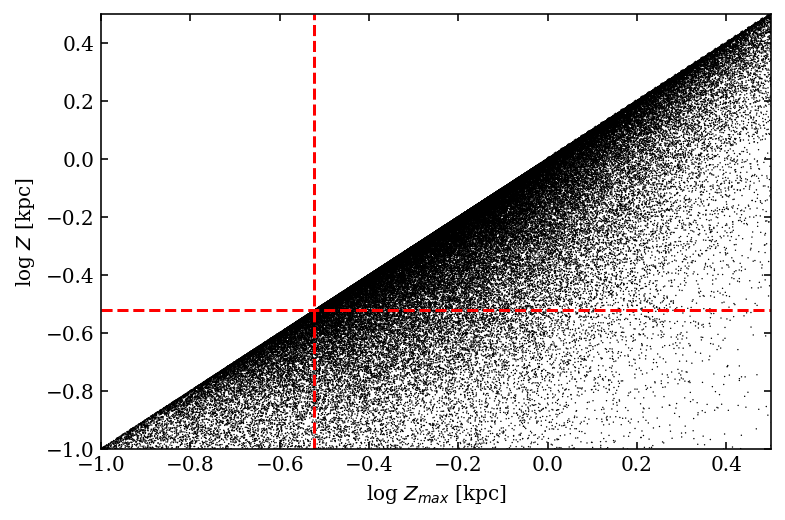

In [84]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter( np.log10(zmax_all), np.log10(np.abs(gc_z)), s=0.5, facecolor='Black', edgecolor='None', marker='o' )
ax.axvline(np.log10(0.3), linestyle='dashed', color='Red')
ax.axhline(np.log10(0.3), linestyle='dashed', color='Red')
ax.plot([0,100],[0,100], linestyle='dotted', color='Black')

ax.set_xlim(-2,0.5)
ax.set_ylim(-2,0.5)
ax.set_xlabel(r'log $Z_{max}$ [kpc]')
ax.set_ylabel(r'log $Z$ [kpc]')

plt.show()
plt.close('all')
pass;

***
# Re-Load and Cut Z
Load the precut AstroNN catalog and calculate the value of $z_{max}$, then compare to the current height.

In [85]:
### Load catalogs
gaiadr2_apogee_catalog = '../../data/generated/gaiadr2-apogee_dataset.FIT'
f = fits.open(gaiadr2_apogee_catalog)
data = f[1].data

In [86]:
### Cut on galactocentric absolute Z < 0.3 kpc
where_low_z = np.where( np.abs(data['Z']) < 0.3 )[0]
data_low_z = data[where_low_z] 
# z_select_text = r'$|$Z$_{GC}| < 0.3$ kpc'
nstars = len(where_low_z)

In [87]:
### Read catalog values

# ID & kinematics
apid = data_low_z['APOGEE_ID']
locid = data_low_z['LOCATION_ID']
vhelio = data_low_z['VHELIO']
pmll = data_low_z['PM_LL']
pmbb = data_low_z['PM_BB']
gc_x = data_low_z['X']
gc_y = data_low_z['Y']
gc_z = data_low_z['Z']
gc_vx = data_low_z['VX']
gc_vy = data_low_z['VY']
gc_vz = data_low_z['VZ']

# Convert to galactocentric radius and radial velocity
gc_R = np.sqrt(np.square(gc_x)+np.square(gc_y))
gc_phi = np.arctan2(gc_y,gc_x)
gc_vR = np.cos(gc_phi)*gc_vx + np.sin(gc_phi)*gc_vy
gc_vT = -np.sin(gc_phi)*gc_vx + np.cos(gc_phi)*gc_vy

# Make into one large kinematic array
gc_kin = np.array((gc_R*apu.kpc, gc_vR*apu.km/apu.s, gc_vT*apu.km/apu.s, gc_z*apu.kpc, gc_vz*apu.km/apu.s))
gc_kin.shape

(5, 44124)

In [88]:
qdf_aA.turn_physical_on()
zmax_cut = np.zeros(nstars)

for i in tqdm_nb( range(nstars) ):
    
    # Calculate zmax. Pass R,vR,vT,z,vz
    aA_vals = qdf_aA.EccZmaxRperiRap(gc_R[i]*apu.kpc, 
                                       gc_vR[i]*apu.km/apu.s, 
                                       gc_vT[i]*apu.km/apu.s, 
                                       gc_z[i]*apu.kpc, 
                                       gc_vz[i]*apu.km/apu.s)
    
    zmax_cut[i] = aA_vals[1].value
    
###i

A Jupyter Widget

/Users/JamesLane/Software/Python/anaconda3/envs/ast1501-dev/lib/python3.6/site-packages/galpy/actionAngle/actionAngleAdiabatic.py:207: RuntimeWarning: overflow encountered in square
  rap= nu.sqrt(Rap**2.+zmax**2.)

/Users/JamesLane/Software/Python/anaconda3/envs/ast1501-dev/lib/python3.6/site-packages/galpy/actionAngle/actionAngleAdiabatic.py:208: RuntimeWarning: invalid value encountered in true_divide
  ecc= (rap-rperi)/(rap+rperi)



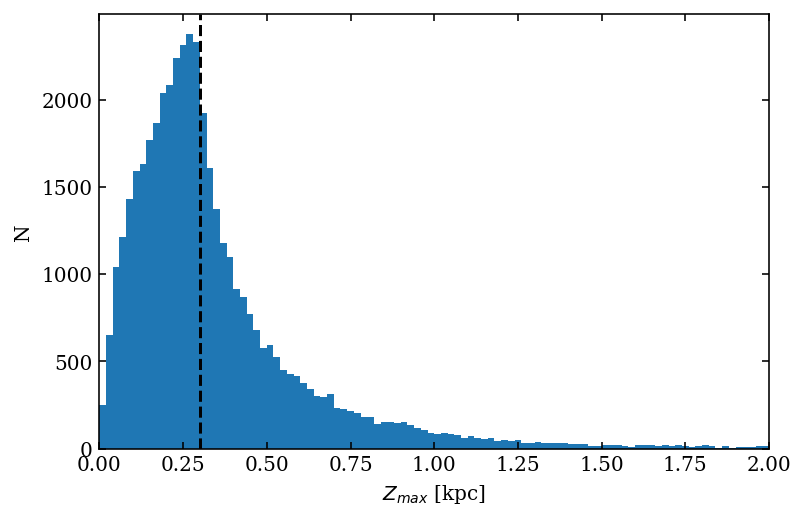

In [89]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist( zmax_cut, bins=100, range=(0,2) )
ax.axvline(0.3, linestyle='dashed', color='Black')

ax.set_xlim(0,2)
ax.set_xlabel(r'$Z_{max}$ [kpc]')
ax.set_ylabel(r'N')

plt.show()
plt.close('all')
pass;

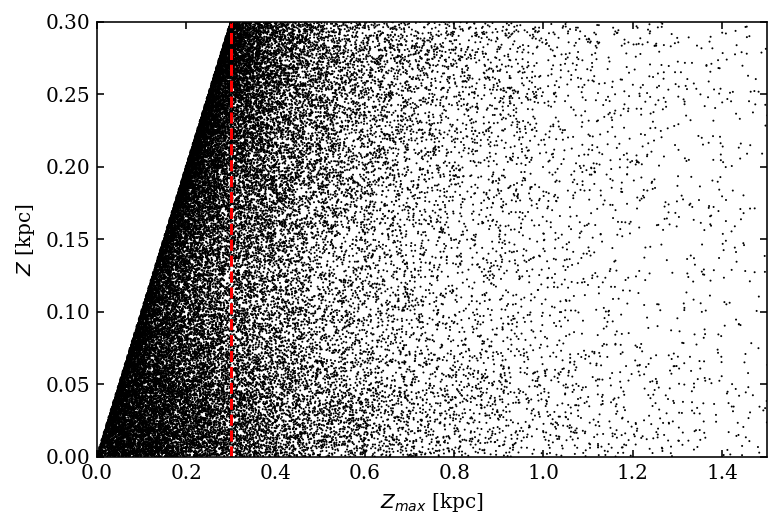

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter( zmax_cut, np.abs(gc_z), s=1, facecolor='Black', edgecolor='None', marker='o' )
ax.axvline(0.3, linestyle='dashed', color='Red')
ax.plot([0,100],[0,100], linestyle='dotted', color='Black')

ax.set_xlim(0,1.5)
ax.set_ylim(0,0.3)
ax.set_xlabel(r'$Z_{max}$ [kpc]')
ax.set_ylabel(r'$Z$ [kpc]')

plt.show()
plt.close('all')
pass;